In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
449,911157302,M,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.115500,...,25.68,32.07,168.20,2022.0,0.13680,0.31010,0.439900,0.228000,0.2268,0.07425
174,871642,B,10.66,15.15,67.49,349.6,0.08792,0.04302,0.000000,0.000000,...,11.54,19.20,73.20,408.3,0.10760,0.06791,0.000000,0.000000,0.2710,0.06164
231,88199202,B,11.32,27.08,71.76,395.7,0.06883,0.03813,0.016330,0.003125,...,12.08,33.75,79.82,452.3,0.09203,0.14320,0.108900,0.020830,0.2849,0.07087
312,89382602,B,12.76,13.37,82.29,504.1,0.08794,0.07948,0.040520,0.025480,...,14.19,16.40,92.04,618.8,0.11940,0.22080,0.176900,0.084110,0.2564,0.08253
178,873357,B,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
79,8610908,B,12.86,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.023150,...,14.24,24.82,91.88,622.1,0.12890,0.21410,0.173100,0.079260,0.2779,0.07918
396,90401601,B,13.51,18.89,88.10,558.1,0.10590,0.11470,0.085800,0.053810,...,14.80,27.20,97.33,675.2,0.14280,0.25700,0.343800,0.145300,0.2666,0.07686
25,852631,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.140100,...,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.385300,0.255000,0.4066,0.10590
35,854253,M,16.74,21.59,110.10,869.5,0.09610,0.13360,0.134800,0.060180,...,20.01,29.02,133.50,1229.0,0.15630,0.38350,0.540900,0.181300,0.4863,0.08633
160,8711561,B,11.75,20.18,76.10,419.8,0.10890,0.11410,0.068430,0.037380,...,13.32,26.21,88.91,543.9,0.13580,0.18920,0.195600,0.079090,0.3168,0.07987


In [3]:
df.shape

(569, 32)

In [4]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['diagnosis']=labelencoder.fit_transform(df['diagnosis'].values)

In [6]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [7]:
df.drop(columns=['id'],inplace=True)

In [8]:
corr_matrix=df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [9]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [10]:
X=df.drop('diagnosis',axis=1).values
Y=df['diagnosis']

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

K-NN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [14]:
y_predict=knn.predict(X_test)

In [15]:
from sklearn.metrics import jaccard_score

jaccard_score(Y_test,y_predict)

0.8958333333333334

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_predict)

array([[66,  0],
       [ 5, 43]], dtype=int64)

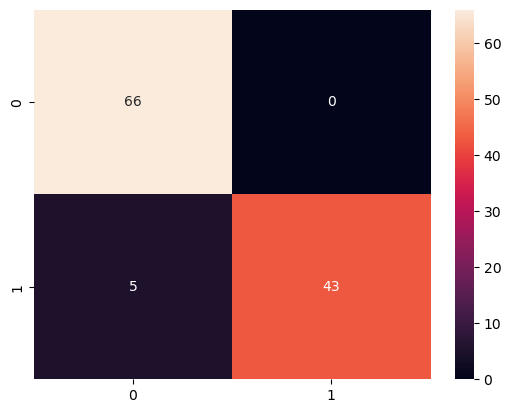

In [17]:
sns.heatmap(confusion_matrix(Y_test,y_predict),annot=True)
plt.show()

precision,recal,f1

In [18]:
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score

precision=precision_score(Y_test,y_predict)
recall=recall_score(Y_test,y_predict)
f1=f1_score(Y_test,y_predict)
accuracy=accuracy_score(Y_test,y_predict)

print(f'{recall=}\n{f1=}\n{accuracy=}\n{precision=}')

recall=0.8958333333333334
f1=0.945054945054945
accuracy=0.956140350877193
precision=1.0


In [19]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [20]:
from sklearn.model_selection import cross_val_predict

predict=cross_val_predict(knn,X=X,y=Y,cv=5)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y,predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



Eng yaxshi K ni topish

In [22]:
f1=[]
for k in range(1,25):
    knn1=KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train,Y_train)
    y_predict=knn.predict(X_test)
    f1.append(f1_score(Y_test,y_predict))

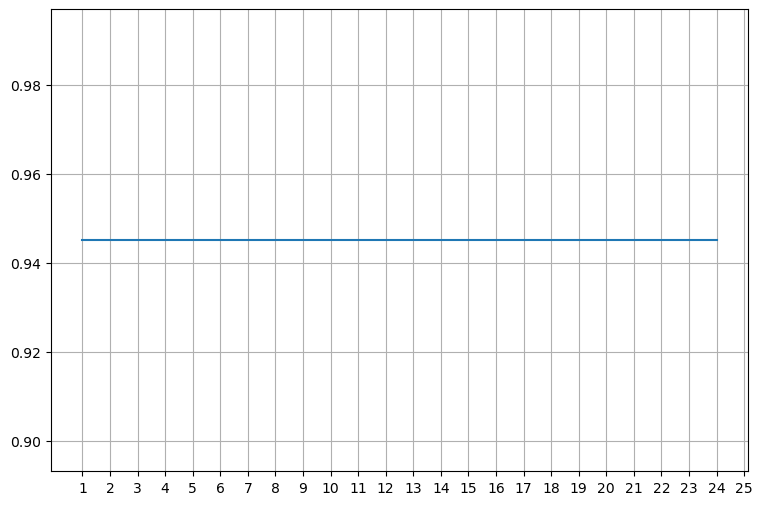

In [23]:
plt.figure(figsize=(9,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,26))
plt.grid()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors':np.arange(1,25)}
knn_gscv=GridSearchCV(knn,param_grid,cv=5)
knn_gscv.fit(X,Y)
print(knn_gscv.cv_results_)

{'mean_fit_time': array([0.00260568, 0.00116005, 0.00146761, 0.00048251, 0.00040088,
       0.        , 0.00065904, 0.        , 0.        , 0.        ,
       0.00148315, 0.00039101, 0.00123672, 0.        , 0.        ,
       0.00040231, 0.        , 0.00152936, 0.00196424, 0.00160074,
       0.        , 0.00182648, 0.00255027, 0.00125785]), 'std_fit_time': array([0.00252363, 0.0013975 , 0.00293522, 0.00096502, 0.00080175,
       0.        , 0.00131807, 0.        , 0.        , 0.        ,
       0.00296631, 0.00078201, 0.00247345, 0.        , 0.        ,
       0.00080462, 0.        , 0.00212215, 0.0017676 , 0.00207949,
       0.        , 0.00225183, 0.00421366, 0.00170111]), 'mean_score_time': array([0.00390038, 0.00575213, 0.00492539, 0.00619435, 0.00558519,
       0.00675726, 0.00561795, 0.00673094, 0.0056056 , 0.00658536,
       0.00474205, 0.005829  , 0.00617433, 0.00713911, 0.00692358,
       0.0066226 , 0.00671349, 0.00643625, 0.0056519 , 0.00507712,
       0.00733938, 0.00319285

In [25]:
knn_gscv.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16])

In [26]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [27]:
knn_gscv.best_score_

0.968390001552554

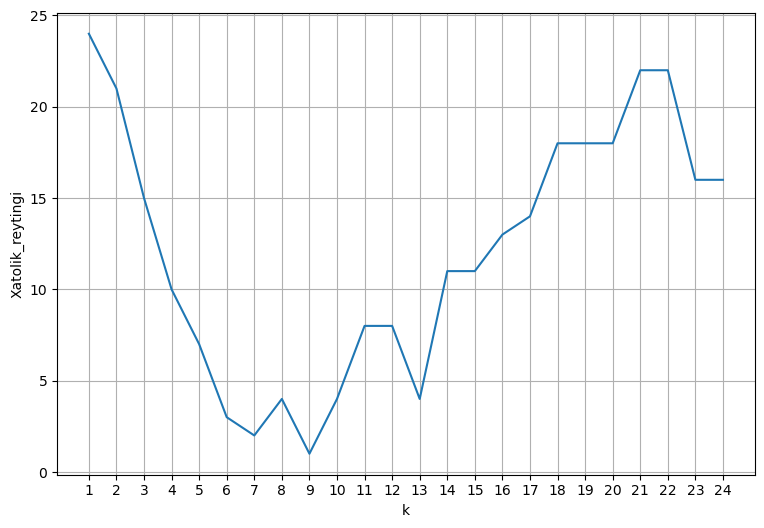

In [28]:
plt.figure(figsize=(9,6))
plt.plot(param_grid['n_neighbors'],knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('k')
plt.ylabel('Xatolik_reytingi')
plt.grid()
plt.show()

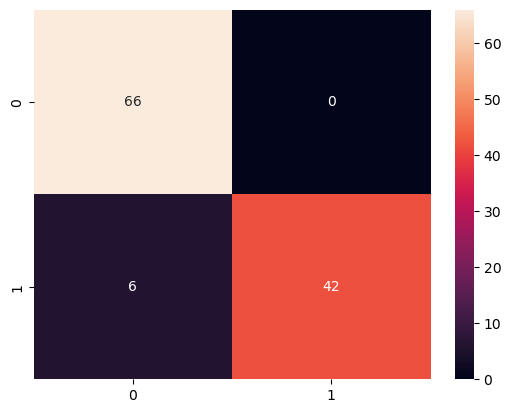

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)

y_predict=knn.predict(X_test)

sns.heatmap(confusion_matrix(Y_test,y_predict),annot=True)
plt.show()

In [30]:
jaccard_score(Y_test,y_predict)

0.875